# Useful Numpy Functions

In [2]:
import numpy as np

In [3]:
# Mean Function
arr = np.array([10, 20, 30, 40])
print(np.mean(arr))

25.0


In [ ]:
# Column-wise mean
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

col_mean = np.mean(X, axis=0)
print(col_mean)

[4. 5. 6.]


In [6]:
# Row-wise mean
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

row_mean = np.mean(X, axis=1)
print(row_mean)

[2. 5. 8.]


# Gradient Descent

In [7]:
import matplotlib.pyplot as plt

#### We want to apply gradient descent to find the minimum of the following function: $f(x) = x^2 + 4x + 4.$

In [ ]:
def f(x):
    return #Write your code here

In [ ]:
def df(x):
    return #Write your code here

The general update rule for Gradient Descent is:

$$
\theta := \theta - \alpha \, \nabla_{\theta} J(\theta)
$$

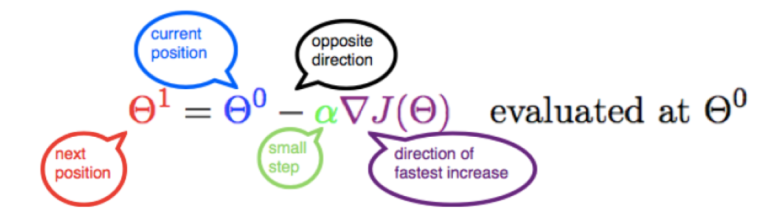

In [ ]:
def gradient_descent(starting_point, learning_rate, iterations):
    #Write your code here
    return 

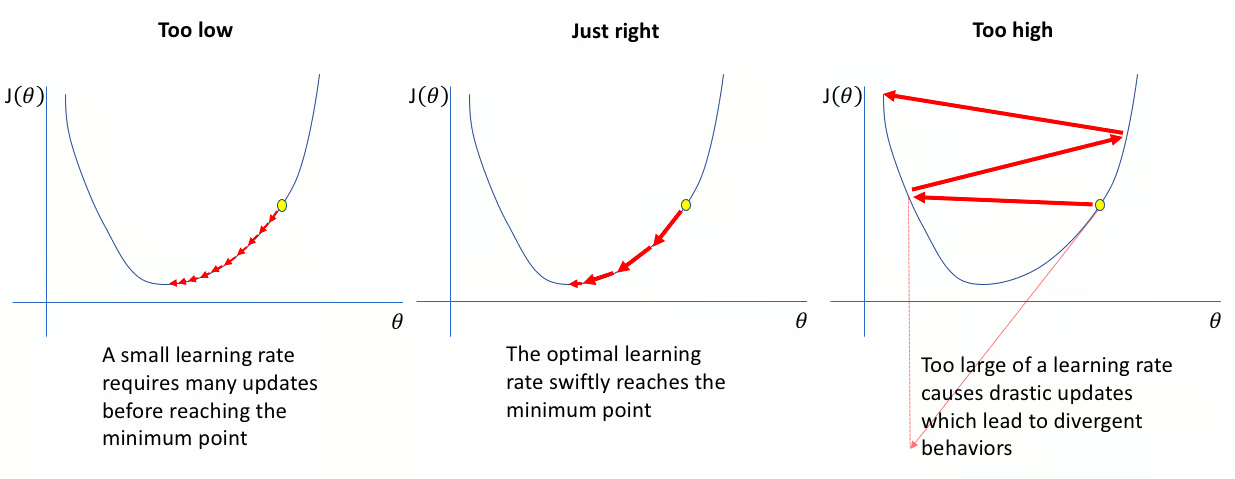

In [ ]:
starting_point = 2
learning_rate = 0.1
iterations = 10

minimum = gradient_descent(starting_point, learning_rate, iterations)
print(f"\nLocal minimum occurs at x = {minimum:.4f}, f(x) = {f(minimum):.4f}")

In [ ]:
x_vals = np.linspace(-10, 2, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = x^2 + 4x + 4")
plt.scatter(minimum, f(minimum), color='red', label="Local Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Visualization")
plt.legend()
plt.show()

# Backpropagation

In [2]:
# A
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]
# B
b = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0]
# C
c = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 1, 1, 1, 0]

# Combine input data into a single 2D NumPy array (3 samples, 30 features each)
X = np.array([a, b, c])

# Creating labels as a 2D NumPy array (3 samples, 3 outputs each)
Y = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

#  Architecture of the Neural Network

### Our neural network will have the following structure:

* Input Layer: 1 layer with 30 nodes (representing the 5x6 grid).
* Hidden Layer: 1 layer with 5 nodes.
* Output Layer: 1 layer with 3 nodes (representing the letters A, B, and C).

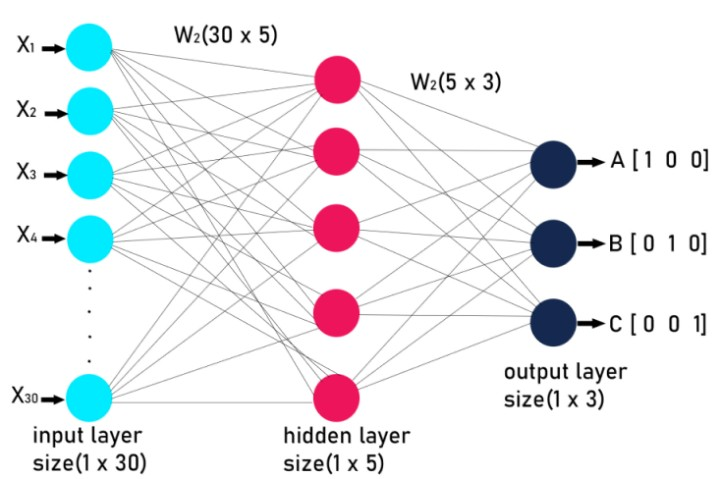

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def f_forward(x, w1, w2):
    # Hidden layer
    z1 = np.dot(x, w1.T)
    a1 = sigmoid(z1)
    
    # Output layer
    z2 = np.dot(a1, w2.T)
    a2 = sigmoid(z2)
    return a2

#### Forward pass

**Hidden layer pre-activation**
$$
z^{(1)} = x W_1^{T}
$$

**Hidden layer activation**
$$
a^{(1)} = \sigma\bigl(z^{(1)}\bigr)
$$

**Output layer pre-activation**
$$
z^{(2)} = a^{(1)} W_2^{T}
$$

**Predicted output**
$$
\hat{y} = a^{(2)} = \sigma\bigl(z^{(2)}\bigr)
$$

---
#### Backward pass (Backpropagation)

Sigmoid derivative:
$$
\sigma'(a) = a(1 - a)
$$

**Output error**
$$
E^{(2)} = y - \hat{y}
$$

**Output delta**
$$
\delta^{(2)} = E^{(2)} \odot \sigma'\bigl(\hat{y}\bigr)
$$

**Hidden layer error**
$$
E^{(1)} = \delta^{(2)} W_2
$$

**Hidden layer delta**
$$
\delta^{(1)} = E^{(1)} \odot \sigma'\bigl(a^{(1)}\bigr)
$$

---

#### Weight updates (batch gradient descent)

Let learning rate be \(\eta\).

**Update output layer weights**
$$
W_2 \leftarrow W_2 + \eta \, (\delta^{(2)})^{T} \, a^{(1)}
$$

**Update hidden layer weights**
$$
W_1 \leftarrow W_1 + \eta \, (\delta^{(1)})^{T} \, x
$$

---

In [ ]:
def sigmoid_derivative(z):
    return #Write your code here

In [ ]:
def backprop(x, w1, w2, y, lr):
    # Forward pass
    # Hidden layer
    hidden_inputs = np.dot(x, w1.T)
    hidden_outputs = sigmoid(hidden_inputs) # Activations from hidden layer
    
    # Output layer
    final_inputs = np.dot(hidden_outputs, w2.T)
    y_pred = sigmoid(final_inputs) # Final predictions
    
    # --- Backward pass ---
    # Calculate error and delta for the output layer
    output_errors = #Write your code here
    output_delta = #Write your code here
    
    # Calculate error and delta for the hidden layer
    hidden_errors = #Write your code here
    hidden_delta = #Write your code here
    
    # --- Update weights ---
    # The formulas here are corrected for batch gradient descent
    w2 = #Write your code here
    w1 = #Write your code here
    
    return w1, w2

In [ ]:
def loss(y, y_pred):
    return #Write your code here

In [24]:
def fit(x, y, w1, w2, epochs, lr):
    losses = []
    for epoch in range(epochs):
        w1, w2 = backprop(x, w1, w2, y, lr)
        # Optional: Print progress
        if (epoch + 1) % 500 == 0:
            y_pred = f_forward(x, w1, w2)
            l = loss(y, y_pred)
            losses.append(l)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {l:.4f}")
            
    return w1, w2, losses

In [25]:
def predict(X, w1, w2):
    outputs = f_forward(X, w1, w2)
    return outputs

In [26]:
w1 = np.random.randn(5, 30)
w2 = np.random.randn(3, 5)

In [27]:
epochs = 5000
learning_rate = 0.1
trained_w1, trained_w2, loss = fit(X, Y, w1, w2, epochs, learning_rate)

Epoch 500/5000, Loss: 0.0160
Epoch 1000/5000, Loss: 0.0055
Epoch 1500/5000, Loss: 0.0032
Epoch 2000/5000, Loss: 0.0022
Epoch 2500/5000, Loss: 0.0017
Epoch 3000/5000, Loss: 0.0013
Epoch 3500/5000, Loss: 0.0011
Epoch 4000/5000, Loss: 0.0010
Epoch 4500/5000, Loss: 0.0008
Epoch 5000/5000, Loss: 0.0007


In [28]:
final_predictions = predict(X, trained_w1, trained_w2)

print("\n--- Final Predictions ---")
print(final_predictions)


--- Final Predictions ---
[[0.97073402 0.02227085 0.01566259]
 [0.03015057 0.96578613 0.03216359]
 [0.01707727 0.02590654 0.96890234]]


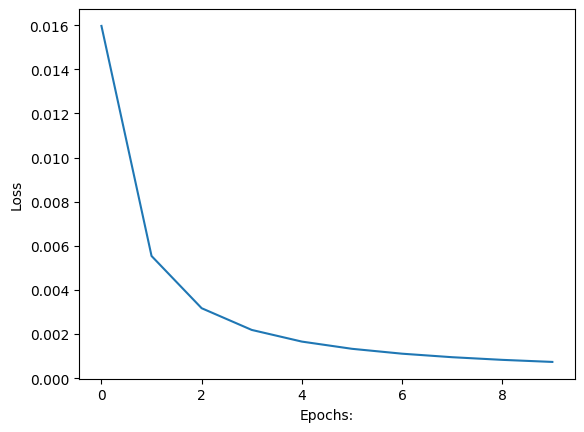

In [29]:
import matplotlib.pyplot as plt1

# plotting Loss
plt1.plot(loss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

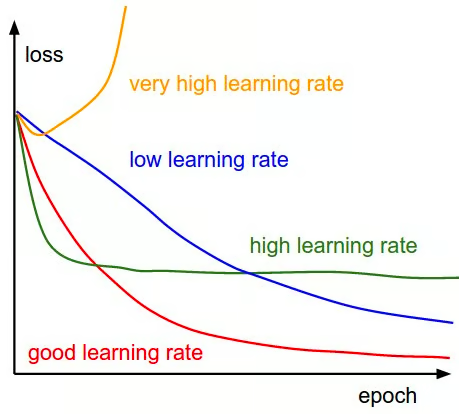